In [1]:
import numpy as np
import cv2
from skimage.io import imread
from skimage.transform import resize

import matplotlib.pyplot as plt
from glob import glob

%matplotlib inline
%load_ext autoreload
%autoreload 2


In [2]:
def visualize(images, samples_per_row=4, title=False):
    sample_rows = len(images) // samples_per_row
    fig, m_axs = plt.subplots(sample_rows, samples_per_row, figsize = (20, 6*sample_rows))
    [c_ax.axis('off') for c_ax in m_axs.flatten()]
    for ax, image in zip(m_axs.flatten(), images):
        img = imread(image)
        ax.imshow(img, cmap='gray')

def visualize_single(image, gray=True):
    if type(image) == np.str_ or type(image) == str:
        image = imread(image)
        
    plt.figure(figsize=(20, 10))
    if gray:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)

def smooth(x, window_len=11, window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    
    return y

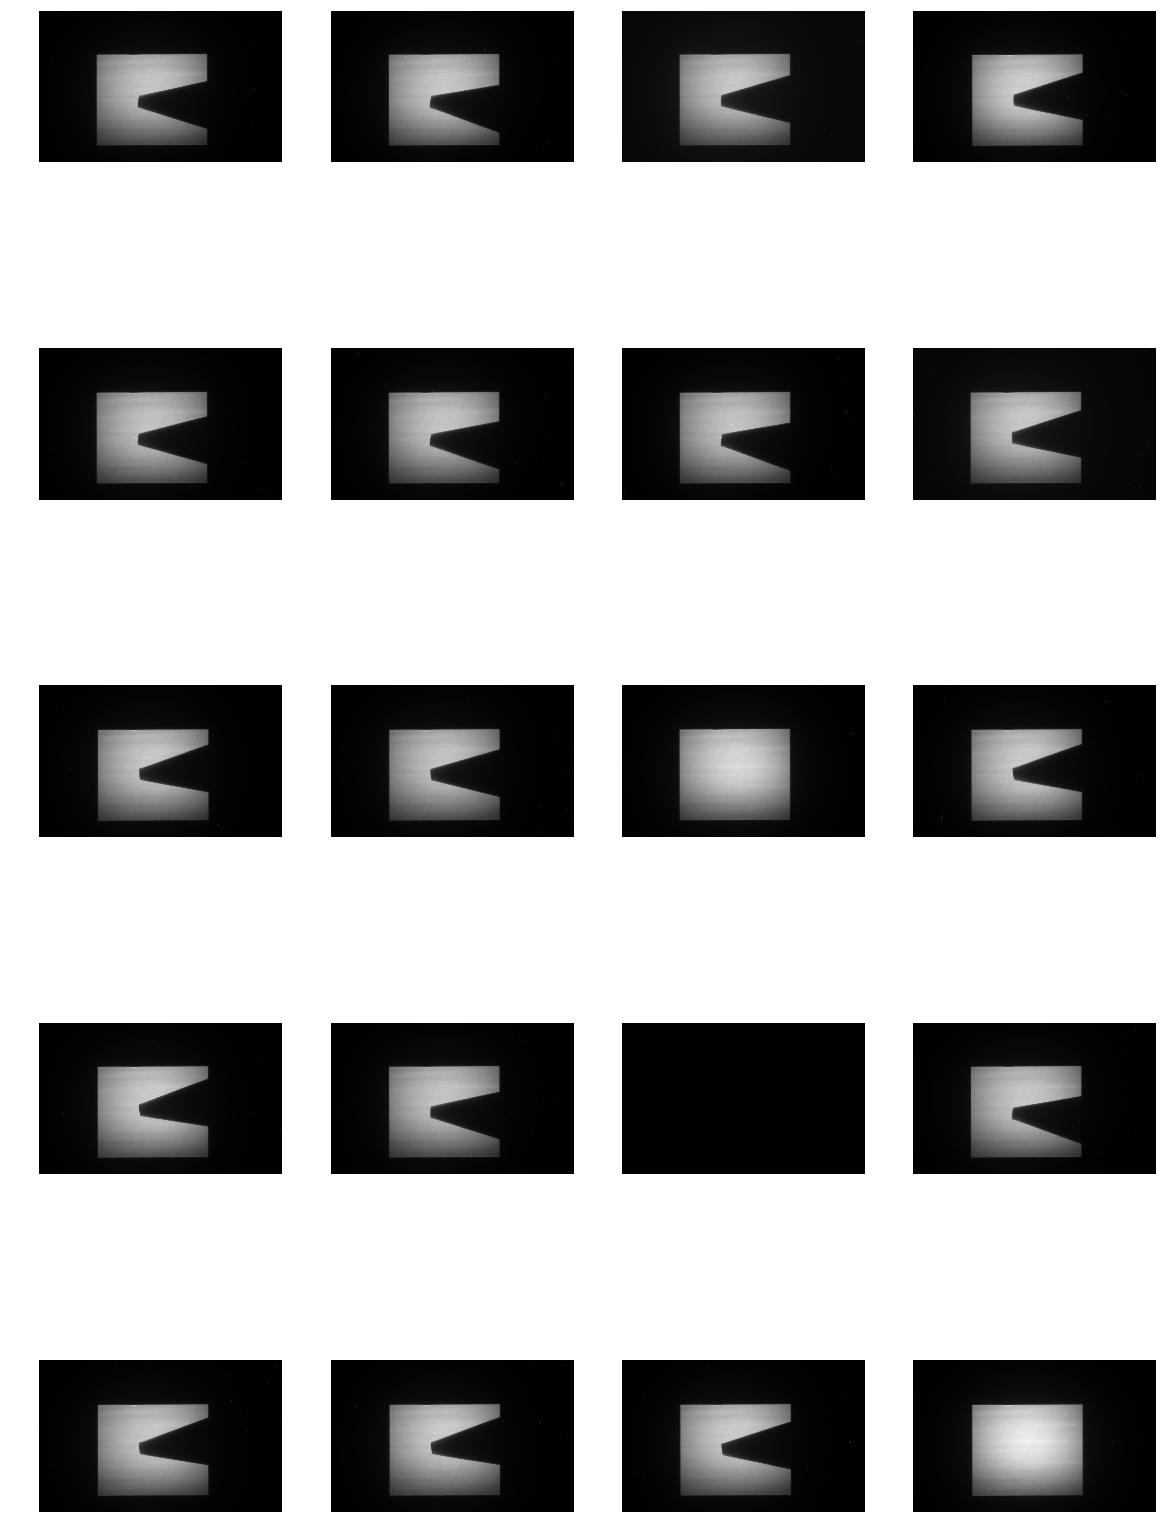

In [3]:
images = glob('./data/pin_tomo/*.tif')
visualize(images)

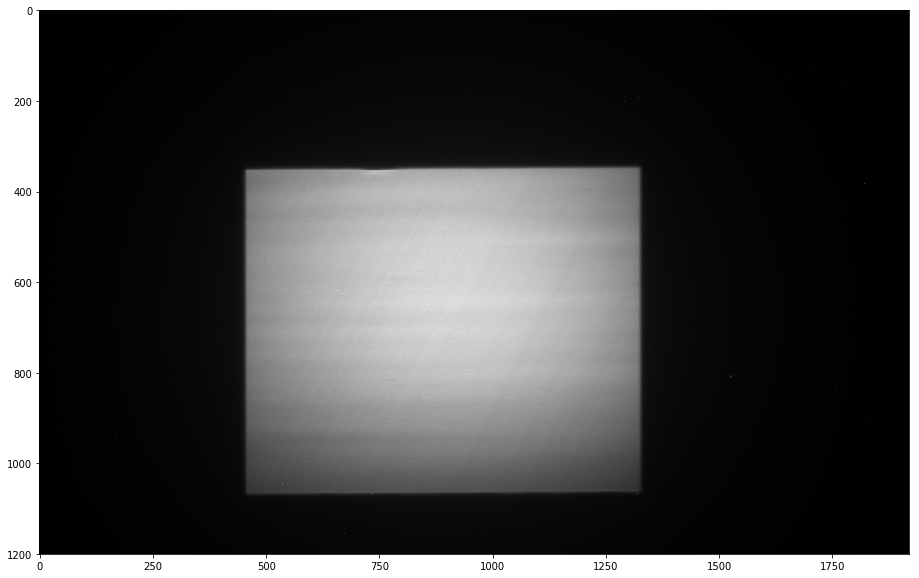

In [4]:
image = images[10]
visualize_single(image)

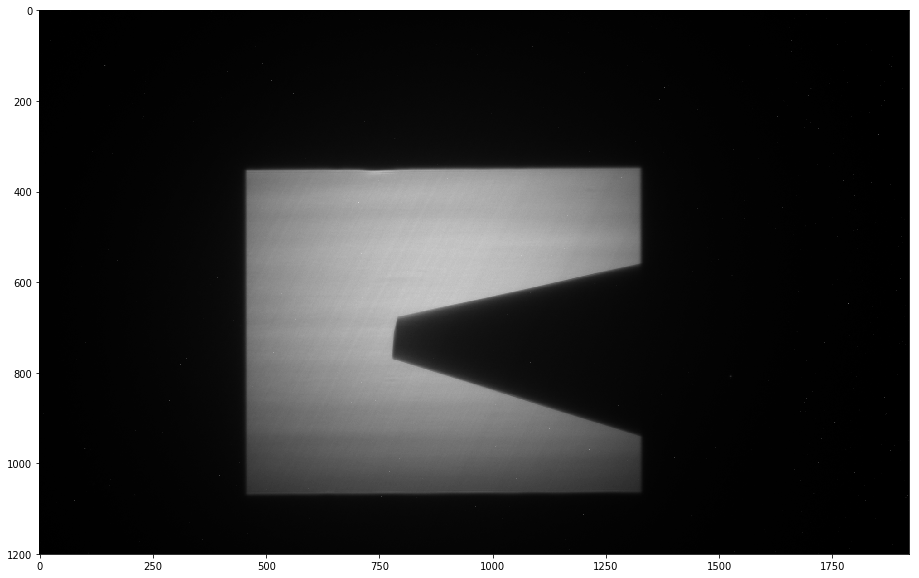

In [5]:
img1 = imread(image)
img2 = imread(np.random.choice(images))
# img2 = np.copy(img)
# ratio = img2.shape[1] / img2.shape[0]
# h = 600
# img2 = resize(img, (h, h*ratio))
visualize_single(img2)

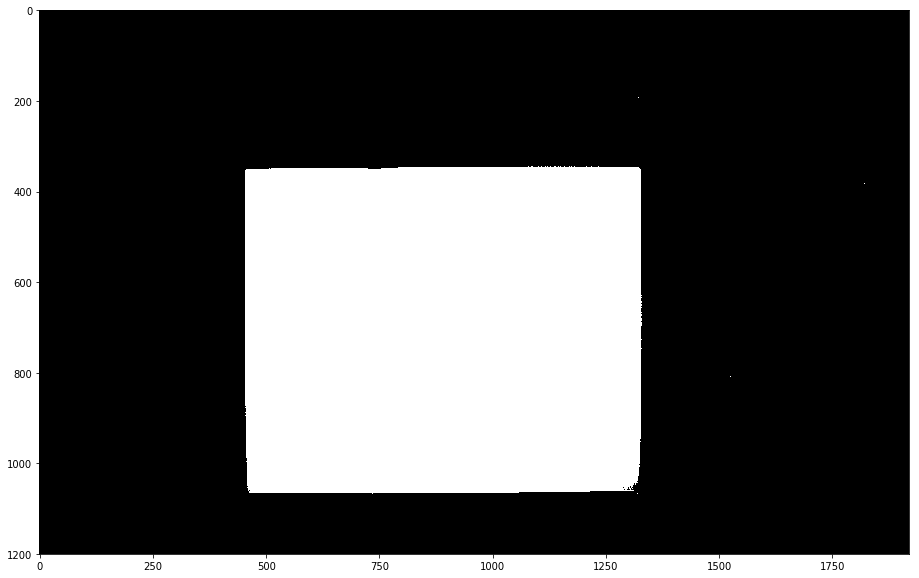

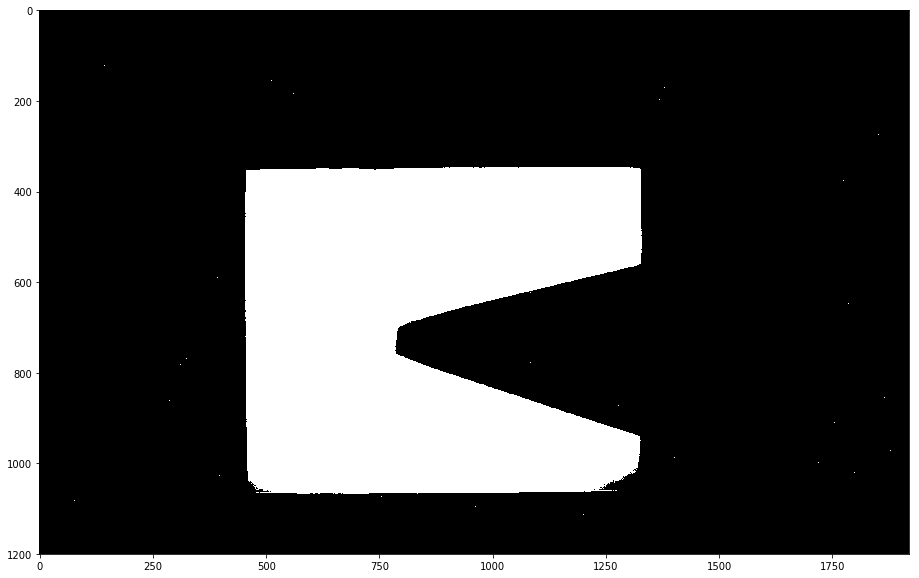

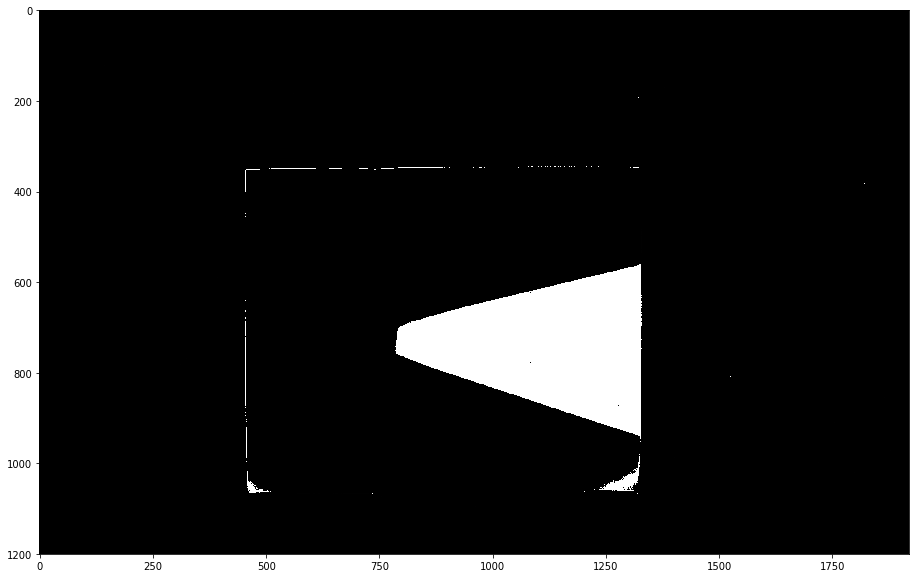

In [52]:
img1_c = np.copy(img1)
img1_c = (img1_c - np.min(img1_c)) / np.max(img1_c)

img2_c = np.copy(img2)
img2_c = (img2_c - np.min(img2_c)) / np.max(img2_c)

binary1 = np.zeros_like(img1_c)
binary2 = np.zeros_like(img2_c)

binary1[img1_c > 0.2] = 1
binary2[img2_c > 0.2] = 1

binary1 = np.uint8(binary1)
binary2 = np.uint8(binary2)
binary3 = binary2 - binary1

visualize_single(binary1)
visualize_single(binary2)
visualize_single(binary3)

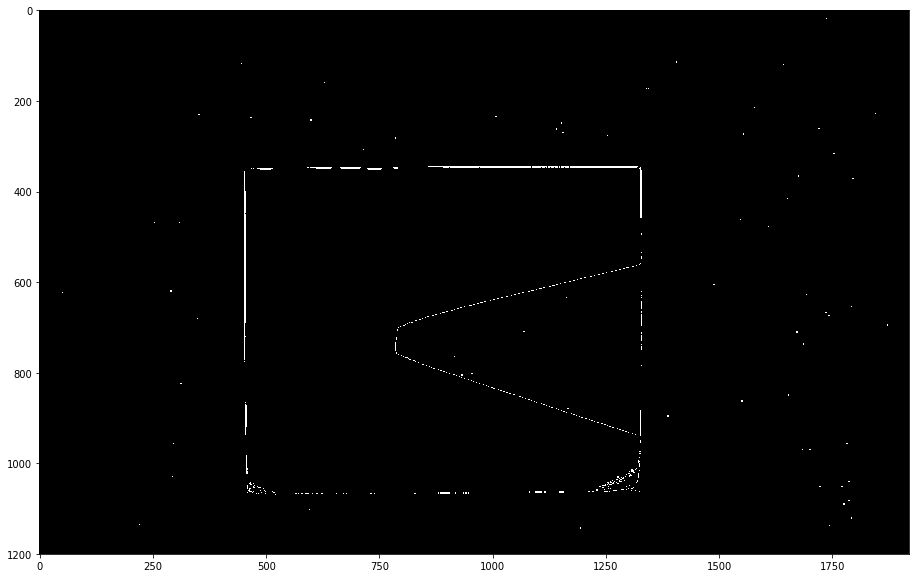

In [54]:
edges = cv2.Canny(binary3, 0.9, 1, apertureSize = 3)
visualize_single(edges)
# lines = cv2.HoughLinesP(edges, 1, np.pi/180, 5, 5, 1);
# # lines = cv2.HoughLines(edges, 1, np.pi/2, 200)
# lines = lines.squeeze()

# output = np.dstack((binary, binary, binary))
# for x0, y0, x1, y1 in lines:
#     slope = (y1 - y0) / (x1 - x0)
    
#     if abs(slope) != 0 and abs(slope) != float('inf'):
#         cv2.line(output, (x0, y0), (x1, y1), (255,0,0), 1)

# visualize_single(output, False)



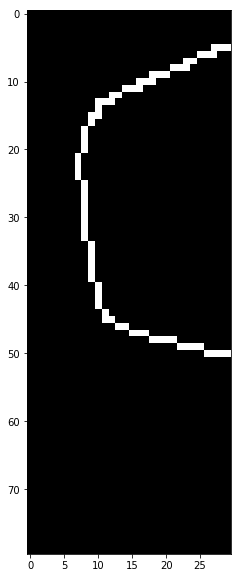

In [89]:
yslice, xslice = slice(320,400), slice(390, 420)
# output = edges[:, :, 0]
patch = edges[yslice, xslice]
visualize_single(patch)

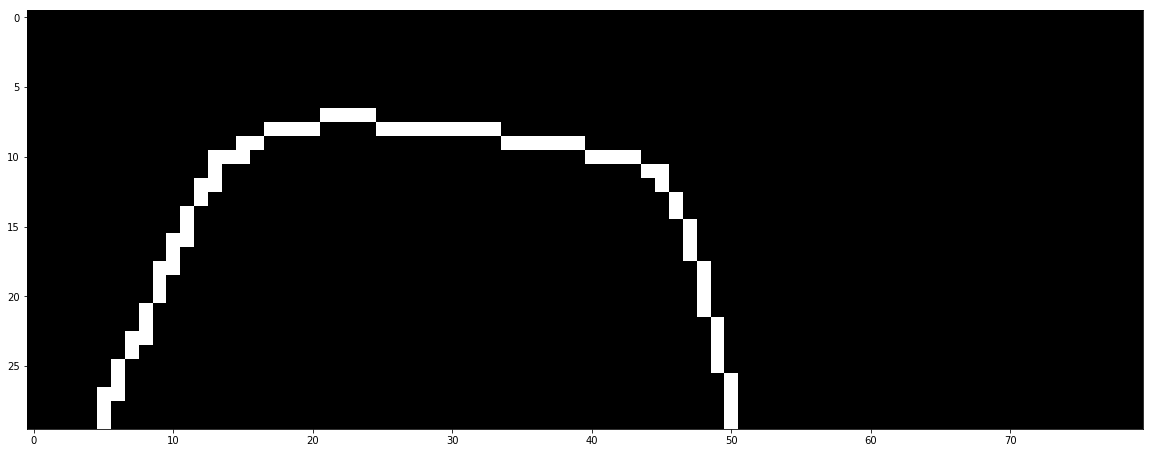

In [90]:
visualize_single(np.transpose(patch))

In [91]:
x, y = np.nonzero(patch)

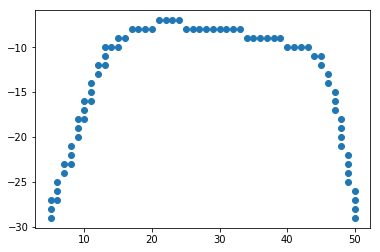

In [92]:
plt.scatter(x, -y)

In [93]:
x

array([ 5,  5,  5,  6,  6,  6,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10,
       11, 11, 11, 12, 12, 13, 13, 13, 14, 15, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 45, 46, 46, 47, 47, 47, 48, 48, 48, 48,
       49, 49, 49, 49, 50, 50, 50, 50])

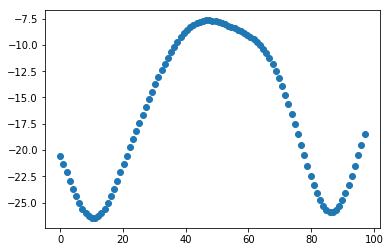

In [94]:
ysmooth =  smooth(-y,22)
xindices = np.linspace(0, len(ysmooth), len(ysmooth))
plt.scatter(xindices, ysmooth)

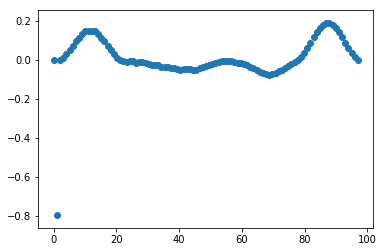

In [95]:
y_df1 = np.insert(np.diff(ysmooth), 0, 0)
y_df2 = np.insert(np.diff(y_df1), 0, 0) 

plt.scatter(np.linspace(0, len(y_df1), len(y_df2)), y_df2)

In [96]:
x_dec = np.where(y_df2 == min(y_df2))[0][0]
x_inc = np.where(y_df2 == max(y_df2))[0][0]

print(x_dec, x_inc)

1 86


In [97]:
max_pt = np.argmax(ysmooth)
print(max_pt)

46


In [98]:
data = ysmooth[max(0, max_pt-30):max_pt+30]
print(data)

[-24.38136359 -23.67395334 -22.9151217  -22.12575142 -21.32732315
 -20.52942892 -19.73949769 -18.96001976 -18.18409425 -17.41508254
 -16.65996287 -15.91390118 -15.17760532 -14.45726217 -13.7576411
 -13.08378585 -12.43421957 -11.81376955 -11.23102274 -10.68486921
 -10.17729435  -9.71320236  -9.29151825  -8.9158612   -8.59210745
  -8.31729023  -8.09044128  -7.91267691  -7.78498319  -7.70812836
  -7.67413226  -7.67543768  -7.70981304  -7.77208838  -7.85461466
  -7.95217464  -8.06033086  -8.17581991  -8.29684239  -8.42322283
  -8.55642526  -8.69942312  -8.85643507  -9.03043456  -9.22500119
  -9.44611826  -9.70164108 -10.00059905 -10.3523933  -10.76596142
 -11.24898324 -11.80719852 -12.44178132 -13.14923569 -13.92382187
 -14.75806634 -15.6434258  -16.57104634 -17.53043456 -18.51038992]


In [99]:
d = np.sign(np.diff(data))
d 

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1.])

In [100]:
np.where(np.convolve(d, [-1, 1]) == 2)

(array([30]),)

In [101]:
len(np.where(np.convolve(d, [-1, 0, -1]) == 2)[0])

27

In [102]:
sum(d[:max_pt])

14.0

In [103]:
sum(d[max_pt:])

-13.0

In [104]:
xslice


slice(390, 420, None)

In [105]:
yslice

slice(320, 400, None)

In [106]:
xslice.start + max_pt

436

In [115]:
yptr = y[max_pt]


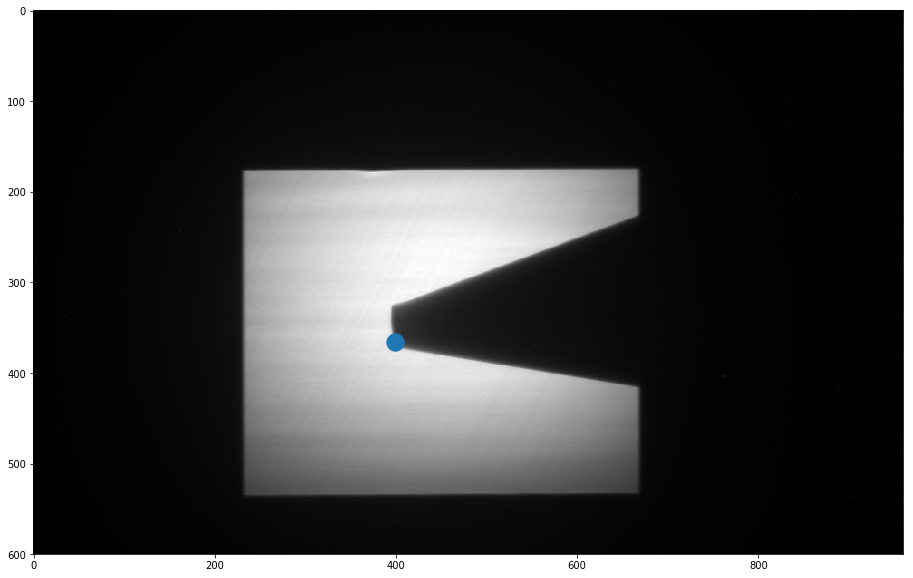

In [116]:
plt.figure(figsize=(20, 10))
plt.imshow(img2, cmap='gray')
plt.scatter(xslice.start+yptr, yslice.start+max_pt, s=300)